In [1]:
# We are going to read the xml
# Break one image with multiple faces
# To multiple images with just the face cropped

In [2]:
!pip install cvlib

In [3]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import torchvision.datasets
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from google.colab import drive

# set the random seed
torch.manual_seed(1) # set the random seed
np.random.seed(1000)

In [4]:
import cv2
import matplotlib.pyplot as plt
import cvlib
from cvlib.object_detection import draw_bbox

import requests 
import xml.etree.ElementTree as ET 

from xml.dom import minidom

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


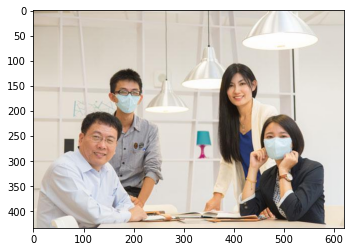

In [6]:
# parsing one file
directory_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/test'

# test by showing the image here
img = cv2.imread(directory_path+'/sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)

mask

category: mask
xmin: 158
ymin: 149
xmax: 216
ymax: 209
(60, 58, 3)
none

category: none
xmin: 98
ymin: 234
xmax: 170
ymax: 311
(77, 72, 3)
none

category: none
xmin: 388
ymin: 136
xmax: 437
ymax: 191
(55, 49, 3)
mask

category: mask
xmin: 458
ymin: 237
xmax: 519
ymax: 301
(64, 61, 3)


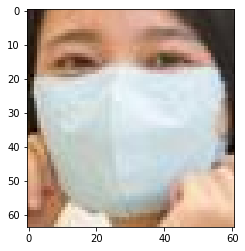

In [7]:
tree = ET.parse(directory_path+'/sample.xml')
root = tree.getroot()

for obj in root.findall('object'):
    category = obj.find('name').text
    print(category)
    for box in obj.findall('bndbox'):
        xmin = int(box.find('xmin').text)
        xmax = int(box.find('xmax').text)
        ymin = int(box.find('ymin').text)
        ymax = int(box.find('ymax').text)

        print()
        print("category:", category)
        print("xmin:", xmin)
        print("ymin:", ymin)
        print("xmax:", xmax)
        print("ymax:", ymax)
        

        cropped_img = img[ymin:ymax, xmin:xmax]
        plt.imshow(cropped_img)
        print(cropped_img.shape)

        # write to file
        # if category is mask -> /output/mask
        # else -> /output/nomask

In [ ]:
# The following code batch processes the images in the dataset by parsing the xml file

In [ ]:
import xml.etree.ElementTree as ET
import os

# parsing one file
label_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/labels/'
image_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/images/'
mask_write_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/mask/'
nomask_write_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/nomask/'

n=0
imageno=0
for file in os.listdir(label_path):
    
    # print(file)
    fileno=file.replace('.xml','')
    print("Filename:", fileno)
    
    f = open(label_path + file, "r")

    tree = ET.parse(f)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        label = obj.find('name').text
        
        for box in obj.findall('bndbox'):   #looping through each face square here
            xmin=int(box.find('xmin').text)
            xmax=int(box.find('xmax').text)
            ymin=int(box.find('ymin').text)
            ymax=int(box.find('ymax').text)

            # print("category detetcted:", label)
            # print(xmin, ",", xmax)
            # print(ymin, ",", ymax)

            if ymin > ymax:
              temp = ymax
              ymax = ymin
              ymin = temp

            if xmin > xmax:
              temp = xmax
              xmax = xmin
              xmin = temp

            #here we find the coordinates and then create images in output
            read_path = image_path+fileno+'.jpg'
            # print("readfin image:", read_path)
            img = cv2.imread(read_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
            plt.imshow(img)

            #cropp the image
            cropped_img = img[ymin:ymax, xmin:xmax]
            cropped_img=cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR);
            # print(img.shape)
            # print(cropped_img.shape)
                        
            if label == "mask":
              cv2.imwrite(mask_write_path+str(n)+'.png', cropped_img)
            else:
              cv2.imwrite(nomask_write_path+str(n)+'.png', cropped_img)

            img = []
            cropped_img = []
            
            n=n+1

    print(" ---------------------- Samples done:", n)

Filename: 140_mask
 ---------------------- Samples done: 1
Filename: 17_mask
 ---------------------- Samples done: 5
Filename: 1125506397_15801322206581n
 ---------------------- Samples done: 8
Filename: 113_mask
 ---------------------- Samples done: 9
Filename: 1477443223-1445746883
 ---------------------- Samples done: 11
Filename: 1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy
 ---------------------- Samples done: 15
Filename: 100_mask
 ---------------------- Samples done: 16
Filename: 1580173904-0001oc33f
 ---------------------- Samples done: 35
Filename: 167_mask
 ---------------------- Samples done: 36
Filename: 1249493
 ---------------------- Samples done: 40
Filename: 101d6660a8974050b613dd2e6bd59390
 ---------------------- Samples done: 44
Filename: 191_mask
 ---------------------- Samples done: 45
Filename: 135_mask
 ---------------------- Samples done: 50
Filename: 12_mask
 ---------------------- Samples done: 54
File